In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [9]:
df = pd.read_csv('data/raw.csv')
df.shape

(2000, 21)

In [10]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


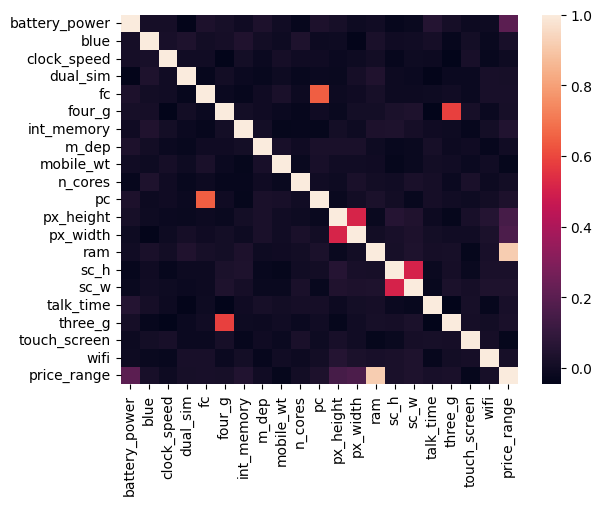

In [11]:
corr_metrix = df.corr()
sns.heatmap(corr_metrix)
plt.show()

In [12]:
df.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [13]:
df.duplicated().sum()

np.int64(0)

In [15]:
if 'price_range' in df.columns:
    print(True)

True


In [7]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [21]:
df.drop_duplicates(inplace=True)

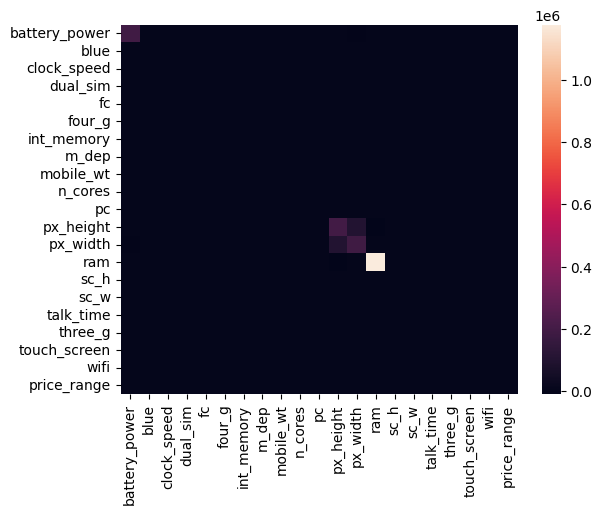

In [23]:
sns.heatmap(df.cov())
plt.show()

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

In [26]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [27]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1500, 20), (500, 20), (1500,), (500,))

In [33]:
models = {
    "LogisticRegression":LogisticRegression(),
    "KNeighborsClassifier":KNeighborsClassifier(),
    "DecisionTreeClassifier":DecisionTreeClassifier(),
    "SVC":SVC(),
    "AdaBoostClassifier":AdaBoostClassifier(),
    "GradientBoostingClassifier":GradientBoostingClassifier(),
    "RandomForestClassifier":RandomForestClassifier()
}

In [30]:
ss = StandardScaler()
ss.fit(X_train)

x_train = ss.transform(X_train)
x_test = ss.transform(X_test)

In [31]:
x_test

array([[ 0.91789445, -0.98412598,  1.19872504, ...,  0.55887025,
         0.99335541, -0.99733688],
       [-0.13258707, -0.98412598, -1.24101385, ...,  0.55887025,
        -1.00668904, -0.99733688],
       [ 1.65594828, -0.98412598,  1.68667282, ...,  0.55887025,
         0.99335541, -0.99733688],
       ...,
       [ 0.59641088, -0.98412598, -0.0211444 , ...,  0.55887025,
        -1.00668904,  1.00267023],
       [-0.54236542, -0.98412598,  1.56468587, ...,  0.55887025,
         0.99335541,  1.00267023],
       [ 0.15720094, -0.98412598, -0.14313135, ..., -1.78932408,
        -1.00668904,  1.00267023]], shape=(500, 20))

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
for name,model in models.items():
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    print(f"accuracy_Score: {accuracy_score(y_test,y_pred)}")
    print(f"confusion_matrix: {confusion_matrix(y_test,y_pred)}")
    print(f"classification_report: {classification_report(y_test,y_pred)}")
    
    print("-"*100)

accuracy_Score: 0.962
confusion_matrix: [[127   5   0   0]
 [  2 116   0   0]
 [  0   5 109   6]
 [  0   0   1 129]]
classification_report:               precision    recall  f1-score   support

           0       0.98      0.96      0.97       132
           1       0.92      0.98      0.95       118
           2       0.99      0.91      0.95       120
           3       0.96      0.99      0.97       130

    accuracy                           0.96       500
   macro avg       0.96      0.96      0.96       500
weighted avg       0.96      0.96      0.96       500

----------------------------------------------------------------------------------------------------
accuracy_Score: 0.518
confusion_matrix: [[94 30  7  1]
 [34 52 26  6]
 [ 7 50 46 17]
 [ 2 16 45 67]]
classification_report:               precision    recall  f1-score   support

           0       0.69      0.71      0.70       132
           1       0.35      0.44      0.39       118
           2       0.37      0.38    

In [35]:
def model_evaluation(actual,predicted):
    
    print(f"accuracy_Score: {accuracy_score(actual,predicted)}")
    print(f"confusion_matrix: {confusion_matrix(actual,predicted)}")
    print(f"classification_report: {classification_report(actual,predicted)}")
    

In [36]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
predicted = rf.predict(x_test)

model_evaluation(y_test,predicted)

accuracy_Score: 0.882
confusion_matrix: [[126   6   0   0]
 [  8 102   8   0]
 [  0  13  95  12]
 [  0   0  12 118]]
classification_report:               precision    recall  f1-score   support

           0       0.94      0.95      0.95       132
           1       0.84      0.86      0.85       118
           2       0.83      0.79      0.81       120
           3       0.91      0.91      0.91       130

    accuracy                           0.88       500
   macro avg       0.88      0.88      0.88       500
weighted avg       0.88      0.88      0.88       500



In [37]:
df.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

In [ ]:
# criterion='gini', 
# max_depth=None, 
# min_samples_split=2, 
# min_samples_leaf=1, 
# min_weight_fraction_leaf=0.0, 
# max_features='sqrt', 
# max_leaf_nodes=None, 
# min_impurity_decrease=0.0, 
# bootstrap=True, oob_score=False, 
# n_jobs=None, random_state=None, 
# verbose=0, 
# warm_start=False, 
# class_weight=None, 
# ccp_alpha=0.0, 
# max_samples=None, 
# monotonic_cst=None